In [1]:
#Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
!pip install squarify

# Carregando os dados

In [3]:
df_games_raw = pd.read_csv('/datasets/games.csv')

# Preparação de dados

## Visão geral dos dados

In [4]:
df_games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games_raw.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11799,Super Ghouls 'n Ghosts,GBA,2002.0,Platform,0.05,0.02,0.0,0.00,78.0,8.8,E
7397,ClayFighter 63 1/3,N64,1997.0,Fighting,0.17,0.04,0.0,0.00,NaN,NaN,NaN
891,X-Men Legends,PS2,2004.0,Role-Playing,1.00,0.72,0.0,0.21,79.0,8.5,T
1193,Hannah Montana: Music Jam,DS,2007.0,Action,1.05,0.36,0.0,0.15,NaN,NaN,NaN
6292,Iron Man 2,X360,2010.0,Action,0.15,0.09,0.0,0.03,41.0,5.9,T


## Renomeando colunas

In [6]:
#Transformando os nomes das colunas em minusculas

df_games_treated = df_games_raw

df_games_treated.rename(str.lower, axis='columns', inplace = True)

## Correção dos tipos de dados

In [7]:
#Coluna user_score

df_games_treated['user_score'].drop_duplicates().sort_values()

2835       0
9970     0.2
5764     0.3
9147     0.5
10482    0.6
        ... 
1645     9.5
3417     9.6
14412    9.7
119      tbd
1        NaN
Name: user_score, Length: 97, dtype: object

In [8]:
#Nessa coluna há o valor 'tbd', ele será substituído por nulo

df_games_treated['user_score'] = df_games_treated['user_score'].replace('tbd',np.nan)

df_games_treated[df_games_treated['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [9]:
#Convertendo a coluna user_score para float

df_games_treated['user_score'] = df_games_treated['user_score'].astype(float)

**Descreva as colunas onde os tipos de dados foram alterados e por quê**

A única coluna com o tipo de dados alterado foi a do 'user_score'. A alteração foi feita do número inteiro para o número decimal pois as notas de rating dos usuários podem possuir valores decimais. 

## Tratando valores ausentes

As colunas com valores ausentes são as: Name, Year_of_Release,Genre, Critic_Score,User_Score e Rating

In [10]:
#Porcentagem de nulos por coluna

df_games_treated.isnull().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [11]:
#Investigando as linhas com o Name nulo

df_games_treated[df_games_treated['name'].isna()]

#Como houve vendas desses jogos eles serão mantidos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#Investigando as linhas com os scores nulos

df_games_treated[df_games_treated['critic_score'].isna()].describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,8576,8578,8463.000000,8576,8578.000000,8578.000000,8578.000000,8578.000000,0.0,573.000000,1895
unique,7122,31,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,6
top,The Amazing Spider-Man 2 (2014),DS,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,E
freq,7,1434,NaN,1479,NaN,NaN,NaN,NaN,NaN,NaN,1182
mean,NaN,NaN,2005.816613,NaN,0.178381,0.085059,0.099045,0.023539,NaN,6.422339,NaN
std,NaN,NaN,7.046218,NaN,0.716068,0.321036,0.343936,0.088740,NaN,1.959321,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,2001.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,5.300000,NaN
50%,NaN,NaN,2008.000000,NaN,0.020000,0.000000,0.000000,0.000000,NaN,7.000000,NaN
75%,NaN,NaN,2011.000000,NaN,0.140000,0.050000,0.060000,0.020000,NaN,7.900000,NaN


In [13]:
#Comparando as linhas do score nulo com as do score não nulo
df_games_treated[~df_games_treated['critic_score'].isna()].describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,8137,8137,7983.000000,8137,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,7017.000000,8054
unique,5085,17,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,7
top,Madden NFL 07,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,E
freq,9,1298,NaN,1890,NaN,NaN,NaN,NaN,NaN,NaN,2808
mean,NaN,NaN,2007.192785,NaN,0.352980,0.208311,0.055028,0.072435,68.967679,7.182428,NaN
std,NaN,NaN,4.189425,NaN,0.896476,0.635622,0.265075,0.249204,13.938165,1.441241,NaN
min,NaN,NaN,1985.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,0.500000,NaN
25%,NaN,NaN,2004.000000,NaN,0.050000,0.010000,0.000000,0.010000,60.000000,6.500000,NaN
50%,NaN,NaN,2007.000000,NaN,0.130000,0.050000,0.000000,0.020000,71.000000,7.500000,NaN
75%,NaN,NaN,2010.000000,NaN,0.340000,0.180000,0.010000,0.060000,79.000000,8.200000,NaN


In [14]:
#Checando os valores unívocos de rating
df_games_treated['rating'].drop_duplicates()

0           E
1         NaN
16          M
39          T
61       E10+
656       K-A
875        AO
4297       EC
13672      RP
Name: rating, dtype: object

In [15]:
#Como a variável é categórica, o Rating dos nulos será 'unknown'

df_games_treated['rating'] = df_games_treated['rating'].fillna('UNKNOWN')

df_games_treated['rating'].drop_duplicates()

0              E
1        UNKNOWN
16             M
39             T
61          E10+
656          K-A
875           AO
4297          EC
13672         RP
Name: rating, dtype: object

In [16]:
# Porcentagem das linhas em que pelo menos um dos ratings(critic_score, user_score, rating) é nulo

((df_games_treated['user_score'].isna())|(df_games_treated['critic_score'].isna())).mean()

0.580197427460365

Como não foi encontrado nenhum padrão nos nulos do critic_score, user_rating e rating não ha um jeito seguro de se substituir esses dados. Uma das opções seria preencher os nulos com 0, mas nesse caso não faria sentido pois atribuiríamos uma nota da crítica ou user_rating de 0 a um jogo que não foi classificado por algum motivo. No caso da coluna rating, como ela é uma coluna categórica o nulo foi substituído por UNKNOWN.

Existem diversas causas possíveis pelas quais quase 60% das linhas não possueirem notas:

1.) Houve um problema em algum ponto da pipe de ingestão dos dados.

2.) O valores estão nulos pois não há nenhuma avaliação de criticos ou de usuários sobre os games.

3.) Há alguma regra de negócio que preenche as linhas com valores nulos.

## Feature engineering

In [17]:
#Criando a coluna de vendas totais do jogo

df_games_treated['total_sales'] = df_games_treated['na_sales']+df_games_treated['eu_sales']+df_games_treated['jp_sales']+df_games_treated['other_sales']

# Analise dos dados

In [18]:
#Visão geral

df_games_treated.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


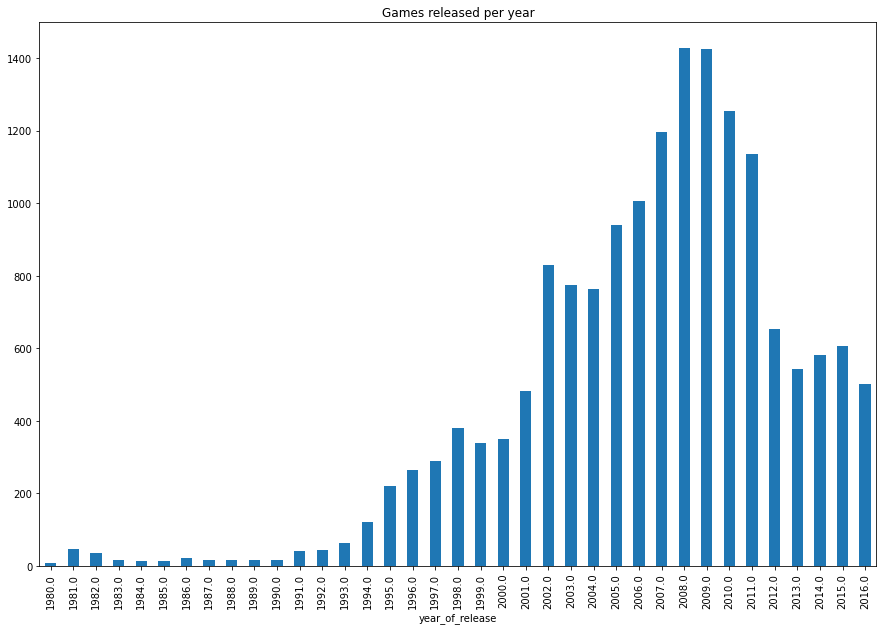

In [19]:
# Quantos jogos foram lançados por ano

# Agrupando por ano
df_games_by_year_count = df_games_treated.groupby(by=['year_of_release']).count()

# Montando o gráfico
df_games_by_year_count.plot(kind='bar'
                            ,y=['na_sales']
                            ,figsize = (15,10)
                            ,title = 'Games released per year'
                            ,legend = False)

plt.show()

A partir dos anos 2000 ocorreu um boom de lançamento de jogos. Antes dos anos 2000, principalmente até o ano de 1995 a produção não era significativa. 

In [20]:
#Investigando quais plataformas venderam mais desde o início

df_games_by_platform_sum = df_games_treated.groupby(by=['platform']).sum()

df_games_by_platform_sum[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sort_values(by=['total_sales'],ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.77
X360,602.47,270.76,12.43,85.76,971.42
PS3,393.49,330.29,80.19,135.68,939.65
Wii,496.90,262.21,69.33,79.07,907.51
DS,382.40,188.89,175.57,59.26,806.12
PS,336.52,213.61,139.82,40.91,730.86
GBA,187.54,75.25,47.33,7.73,317.85
PS4,108.74,141.09,15.96,48.35,314.14
PSP,109.17,66.68,76.78,41.42,294.05


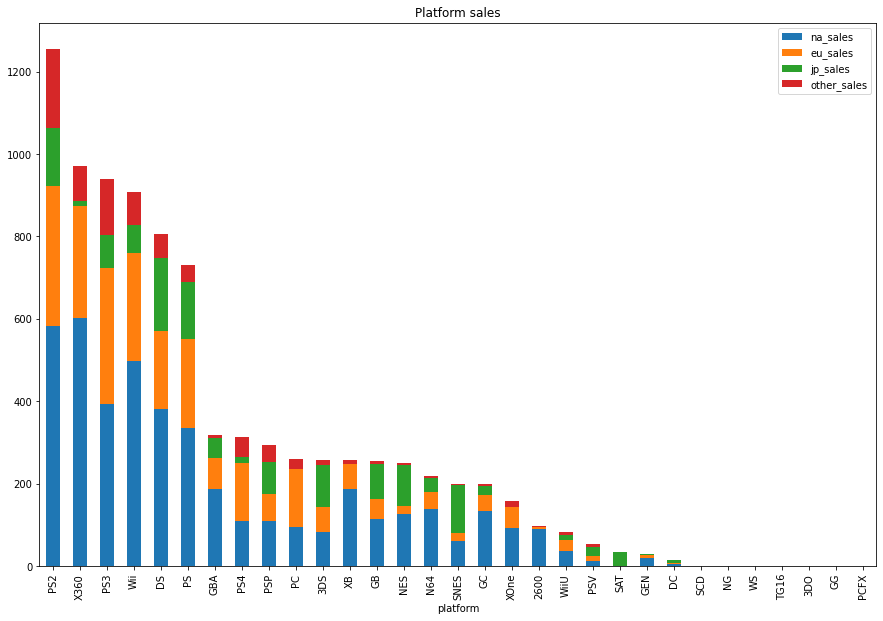

In [21]:
# Gráfico com os resultados

# Ordenando pelo maior número total de vendas

df_games_by_platform_sum_sorted = df_games_by_platform_sum.sort_values(by=['total_sales'],ascending=False)

df_games_by_platform_sum_sorted.plot(kind='bar'
                            ,y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
                            ,figsize =(15,10)
                            ,title ='Platform sales'
                            ,legend =True
                            ,stacked=True)

plt.show()

In [22]:
# Olhando a distribuição das plataformas por ano

# Para facilitar a visualização, vamos selecionar apenas algumas plataformas para análise

df_games_by_platform_sum_sorted['total_sales_percentage'] = (df_games_by_platform_sum_sorted['total_sales'] / df_games_by_platform_sum_sorted['total_sales'].sum())

df_games_by_platform_sum_sorted['total_sales_percentage'].cumsum()

#Para um estudo mais aprofundado vamos olhar para as 8 maiores plataformas(até PS4), que representam 70% do total das vendas

platform
PS2     0.140849
X360    0.249805
PS3     0.355198
Wii     0.456985
DS      0.547401
PS      0.629376
GBA     0.665026
PS4     0.700261
PSP     0.733242
PC      0.762350
3DS     0.791400
XB      0.820308
GB      0.848961
NES     0.877119
N64     0.901647
SNES    0.924083
GC      0.946396
XOne    0.964265
2600    0.975143
WiiU    0.984361
PSV     0.990426
SAT     0.994193
GEN     0.997645
DC      0.999434
SCD     0.999642
NG      0.999804
WS      0.999963
TG16    0.999981
3DO     0.999992
GG      0.999997
PCFX    1.000000
Name: total_sales_percentage, dtype: float64

In [23]:
df_games_by_platform_sum_sorted['total_sales_percentage'].index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

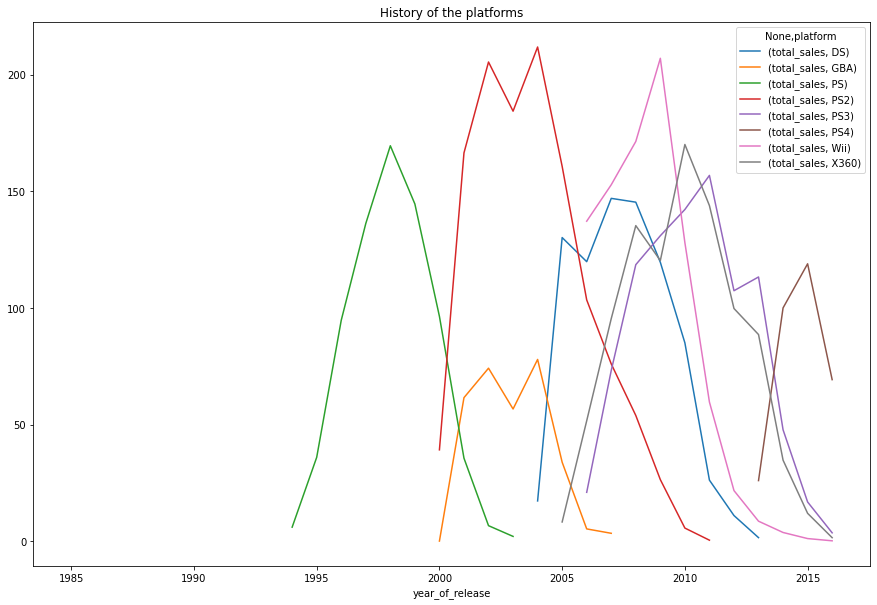

In [24]:
# Filtrando as maiores plataformas

biggest8_platform_mask = df_games_treated['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4'])

# Agrupando por ano as somas das maiores plataformas

df_games_by_year_and_platform = pd.pivot_table(df_games_treated[biggest8_platform_mask]
                                      , index=['year_of_release']
                                      , columns=['platform']
                                      , values=['total_sales']
                                      , aggfunc ='sum')

# Montando o gráfico
df_games_by_year_and_platform.plot(kind='line'
                            ,figsize = (15,10)
                            ,title = 'History of the platforms'
                            ,legend = True)

plt.show()

## Comentários sobre as plataformas

Podemos observar que as plataformas seguem um padrão, primeiro elas entram em ascensão, depois se mantém em um pico por algum tempo e então começam a decair.

A janela de tempo que isso acontece é entre 5 e 10 anos. Isso varia de plataforma para plataforma. Normalmente o decaimento de uma plataforma coincide com a ascensão de outra.

In [25]:
#Investigando mais a fundo a porcentagem dos jogos que foram lançados ano a ano

df_games_by_year_count['total_sales'].cumsum()/df_games_by_year_count['total_sales'].sum()

year_of_release
1980.0    0.000547
1981.0    0.003344
1982.0    0.005533
1983.0    0.006567
1984.0    0.007418
1985.0    0.008269
1986.0    0.009546
1987.0    0.010519
1988.0    0.011431
1989.0    0.012465
1990.0    0.013438
1991.0    0.015931
1992.0    0.018546
1993.0    0.022315
1994.0    0.029673
1995.0    0.042989
1996.0    0.058981
1997.0    0.076554
1998.0    0.099599
1999.0    0.120151
2000.0    0.141433
2001.0    0.170741
2002.0    0.221148
2003.0    0.268272
2004.0    0.314605
2005.0    0.371701
2006.0    0.432871
2007.0    0.505655
2008.0    0.592424
2009.0    0.679132
2010.0    0.755442
2011.0    0.824517
2012.0    0.864222
2013.0    0.897300
2014.0    0.932628
2015.0    0.969476
2016.0    1.000000
Name: total_sales, dtype: float64

No comentário sobre o número de jogos foi falado que a produção de jogos não era relevante antes de 1995, e é verdade. Aproximadamente 95% dos jogos foram lançados depois de 1995.

Para construção do modelo de 2017 nós utilizaremos os dados a partir de 2013. Isso representa aproximadamente 10% dos dados.

In [26]:
# Máscara para filtragem do ano

year_mask = df_games_treated['year_of_release'] >= 2013

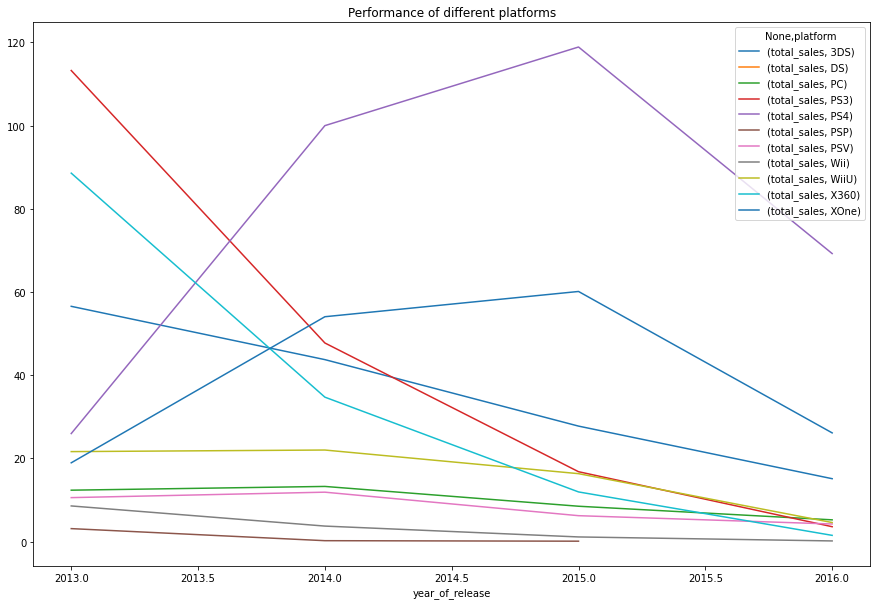

In [27]:
#Plataformas que estão liderando em vendas

# Agrupando por ano as somas das maiores plataformas

df_games_by_year_and_platform = pd.pivot_table(df_games_treated[year_mask]
                                      , index=['year_of_release']
                                      , columns=['platform']
                                      , values=['total_sales']
                                      , aggfunc ='sum')

# Montando o gráfico
df_games_by_year_and_platform.plot(kind='line'
                            ,figsize = (15,10)
                            ,title = 'Performance of different platforms'
                            ,legend = True)

plt.show()

#Para uma análise mais aprofundada vamos escolher apenas as 4 maiores plataformas dos dois últimos anos

/tmp/ipykernel_73/4015562288.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_games_by_year_and_platform = pd.pivot_table(df_games_treated[year_mask][big4_mask]


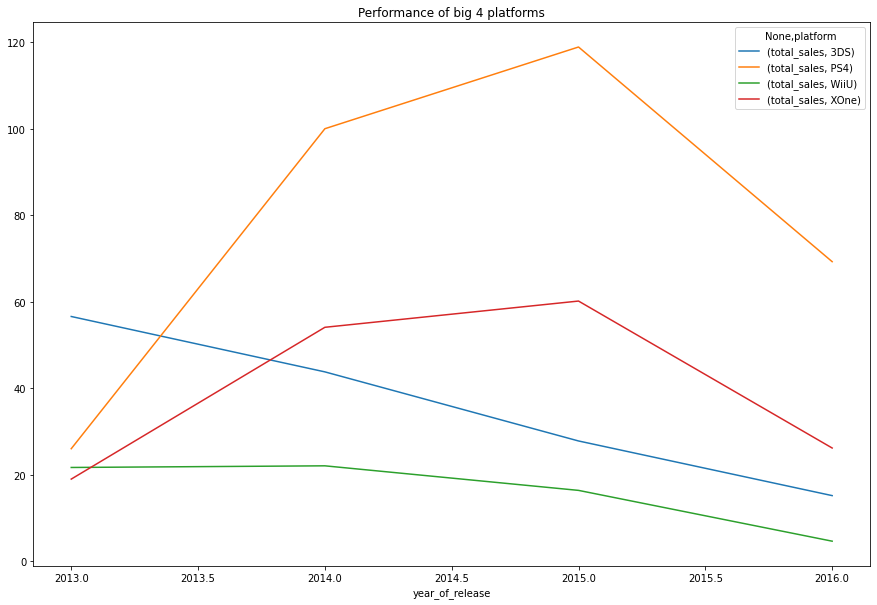

In [28]:
#Filtro das plataformas que mais estão vendendo(lado direito do gráfico)

big4_mask = df_games_treated['platform'].isin(['XOne', '3DS', 'WiiU','PS4'])


# Agrupando por ano as somas das maiores plataformas

df_games_by_year_and_platform = pd.pivot_table(df_games_treated[year_mask][big4_mask]
                                      , index=['year_of_release']
                                      , columns=['platform']
                                      , values=['total_sales']
                                      , aggfunc ='sum')

# Montando o gráfico
df_games_by_year_and_platform.plot(kind='line'
                            ,figsize = (15,10)
                            ,title = 'Performance of big 4 platforms'
                            ,legend = True)

plt.show()

As plataformas que estão liderando em vendas são:

1. PS4
2. XOne
3. 3DS
4. WiiU

Todas as plataformas estão diminuindo as vendas recentemente. Isso pode ter acontecido pois não foi lançado algum jogo tão bom quanto o PS4 ou o XOne (ambos foram lançados aproximadamente em 2013) nos últimos anos.

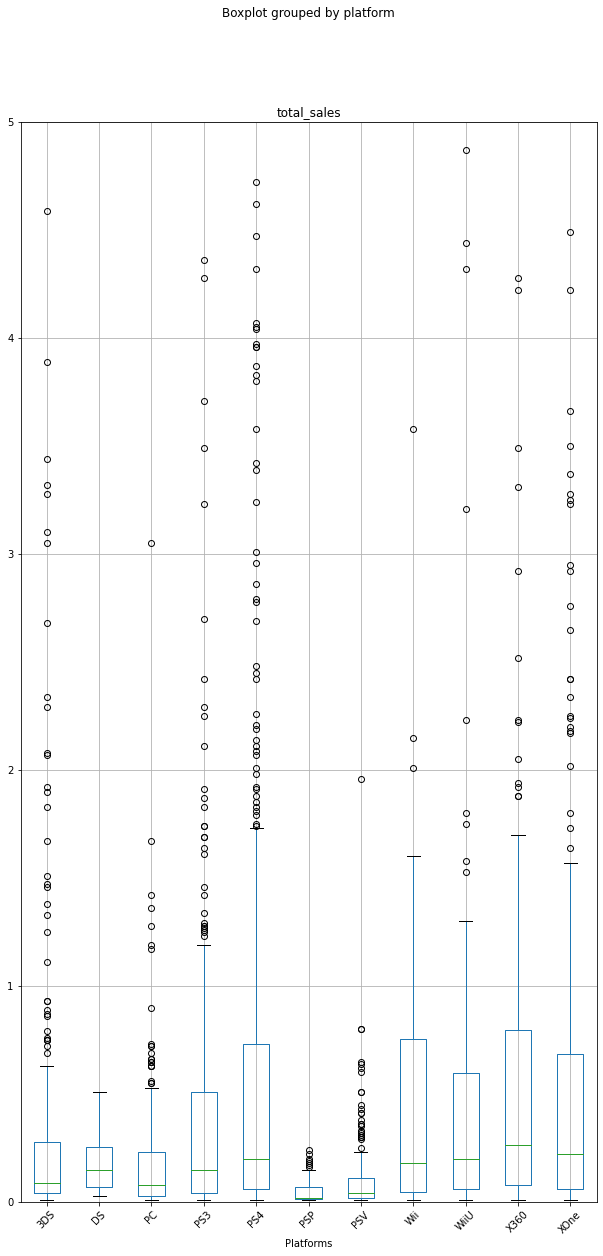

In [29]:
# Investigando o impacto da plataforma sobre a venda dos jogos

df_games_treated[year_mask].boxplot(column=['total_sales']
                                    , by=['platform']
                                    , rot=45
                                    , figsize=(10,20))
# Set plot parameters
plt.ylim(0,5)
plt.xlabel('Platforms')
plt.grid(True)

#Showing the graph
plt.show()

In [30]:
# Vendas médias nas diferentes plataformas

df_games_treated[year_mask].groupby(by=['platform'])['total_sales'].mean().sort_values(ascending=False)

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales, dtype: float64

## Comentários sobre as vendas em diferentes plataformas

Nota-se que diferentes plataformas tem diferentes números de vendas. A mediana e o terceiro quartil são diferentes entre diferentes plataformas. 

É importante ressaltar que aqui não estamos comparando necessariamente os mesmos jogos, mas sim todos os jogos. Alguns jogos serão lançados em mais de uma plataforma, outros não. O jogo do God of War, exclusivo do Playstation, por exemplo, não pode ser comparado com o God of war de outras plataformas(já que ele não existe em outras plataformas).

Para avaliar a performance das plataformas o jogo precisaria ser o mesmo.

In [31]:
# Como as avaliações afetam as vendas na plataforma PS3

ps3_mask = df_games_treated['platform']=='PS3'

# Calculando a correlação

df_games_treated[ps3_mask][['na_sales', 'eu_sales','jp_sales', 'other_sales','total_sales', 'critic_score', 'user_score']].corr()

,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
na_sales,1.000000,0.812589,0.341841,0.872146,0.936717,0.454512,0.137144
eu_sales,0.812589,1.000000,0.371473,0.974316,0.957884,0.380806,0.084722
jp_sales,0.341841,0.371473,1.000000,0.375885,0.456083,0.204089,0.170002
other_sales,0.872146,0.974316,0.375885,1.000000,0.976455,0.395003,0.110032
total_sales,0.936717,0.957884,0.456083,0.976455,1.000000,0.432432,0.126691
critic_score,0.454512,0.380806,0.204089,0.395003,0.432432,1.000000,0.629005
user_score,0.137144,0.084722,0.170002,0.110032,0.126691,0.629005,1.000000


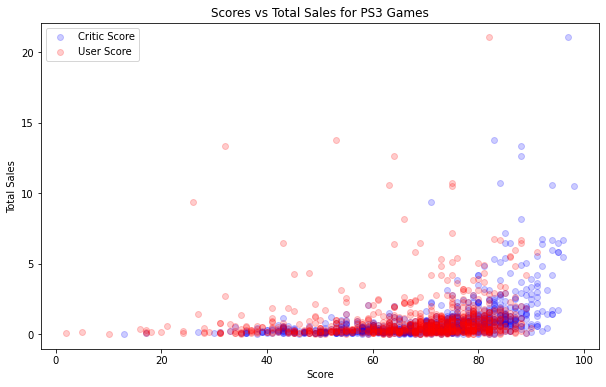

In [32]:
# Montando o gráfico de dispersão para os jogos de PS3
# O score do usuário foi multiplicado por 10 para ter a mesma escala do score dos críticos


# Colocando um tamanho maior na figura
fig, ax = plt.subplots(figsize=(10, 6))

# Plots
plt.scatter(df_games_treated[ps3_mask]['critic_score']
            , df_games_treated[ps3_mask]['total_sales']
            , c='blue'
            , label='Critic Score'
            , alpha=0.2)

plt.scatter(df_games_treated[ps3_mask]['user_score']*10
            , df_games_treated[ps3_mask]['total_sales']
            , c='red'
            , label='User Score'
            , alpha=0.2)

# Setando os parametros do gráfico
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.title('Scores vs Total Sales for PS3 Games')
plt.legend()

# Mostrando o gráfico
plt.show()

## Relação entre scores da crítica e retorno em vendas

Não se pode observar uma relação clara entre os scores dos usuários e dos críticos com relação ao total de vendas para os jogos de PS3.

Existe uma correlação, mas ela não é forte. Seria dificil estimar um valor de venda de algum jogo baseado na pontuação da crítica e/ou dos usuários e vice-versa, seria dificil prever a nota dos críticos e/ou dos usuários baseado no valor total de vendas.

Dois pontos a se notar são: 
1.) O critic_score é um melhor preditor de vendas do que o user_score (as correlações entre o critic_score e o as colunas de vendas são todas maiores do que as de user_score)

2.) A correlação mais forte com o total_sales é o other_sales (0.97). Uma possibilidade para se predizer as vendas totais de um jogo seria realizar um teste estatístico nas regiões englobadas pelo 'other_sales'. 

In [33]:
# Vendas dos mesmos jogos em diferentes plataformas
# Montando uma tabela com os jogos em diferentes plataformas

df_more_than_1platform = df_games_treated[df_games_treated[['name','genre']].duplicated()].sort_values(by=['total_sales']).reset_index()

df_more_than_1platform

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,UNKNOWN,0.00
1,16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
2,16146,Don Bradman Cricket 14,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
3,16144,Penguins of Madagascar,Wii,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
4,16142,MLB 15: The Show,PSV,2015.0,Sports,0.01,0.00,0.00,0.00,NaN,8.8,E,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5146,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
5147,37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
5148,35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


In [34]:
#Montando uma tabela dinamica com o nome dos jogos vs. vendas nas diferentes plataformas

df_games_by_different_platforms = pd.pivot_table(df_more_than_1platform
                                      , index=['name']
                                      , columns=['platform']
                                      , values=['total_sales']
                                      , fill_value = 0
                                      , aggfunc ='sum')

df_games_by_different_platforms

total_sales                                  \
platform                                2600  3DS   DC    DS   GB  GBA    GC   
name                                                                           
 Frozen: Olaf's Quest                    0.0  0.0  0.0  0.51  0.0  0.0  0.00   
007: Quantum of Solace                   0.0  0.0  0.0  0.13  0.0  0.0  0.00   
007: The World is not Enough             0.0  0.0  0.0  0.00  0.0  0.0  0.00   
11eyes: CrossOver                        0.0  0.0  0.0  0.00  0.0  0.0  0.00   
18 Wheeler: American Pro Trucker         0.0  0.0  0.0  0.00  0.0  0.0  0.11   
...                                      ...  ...  ...   ...  ...  ...   ...   
iCarly                                   0.0  0.0  0.0  0.00  0.0  0.0  0.00   
iCarly 2: iJoin The Click!               0.0  0.0  0.0  0.00  0.0  0.0  0.00   
nail'd                                   0.0  0.0  0.0  0.00  0.0  0.0  0.00   
pro evolution soccer 2011                0.0  0.0  0.0  0.00  0.0  0.0  0.00   
uDraw Studio: Instant Artist             0.0  0.0  0.0  0.00  0.0  0.0  0.00   

                                                 ...                       \
platform                          GEN  N64  NES  ...   PSP  PSV  SAT SNES   
name                                             ...                        
 Frozen: Olaf's Quest             0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
007: Quantum of Solace            0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
007: The World is not Enough      0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
11eyes: CrossOver                 0.0  0.0  0.0  ...  0.02  0.0  0.0  0.0   
18 Wheeler: American Pro Trucker  0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
...                               ...  ...  ...  ...   ...  ...  ...  ...   
iCarly                            0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
iCarly 2: iJoin The Click!        0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
nail'd                            0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   
pro evolution soccer 2011         0.0  0.0  0.0  ...  0.80  0.0  0.0  0.0   
uDraw Studio: Instant Artist      0.0  0.0  0.0  ...  0.00  0.0  0.0  0.0   

                                                                  
platform                           WS   Wii WiiU  X360   XB XOne  
name                                                              
 Frozen: Olaf's Quest             0.0  0.00  0.0  0.00  0.0  0.0  
007: Quantum of Solace            0.0  0.65  0.0  0.00  0.0  0.0  
007: The World is not Enough      0.0  0.00  0.0  0.00  0.0  0.0  
11eyes: CrossOver                 0.0  0.00  0.0  0.00  0.0  0.0  
18 Wheeler: American Pro Trucker  0.0  0.00  0.0  0.00  0.0  0.0  
...                               ...   ...  ...   ...  ...  ...  
iCarly                            0.0  0.45  0.0  0.00  0.0  0.0  
iCarly 2: iJoin The Click!        0.0  0.10  0.0  0.00  0.0  0.0  
nail'd                            0.0  0.00  0.0  0.11  0.0  0.0  
pro evolution soccer 2011         0.0  0.22  0.0  0.60  0.0  0.0  
uDraw Studio: Instant Artist      0.0  0.00  0.0  0.02  0.0  0.0  

[2804 rows x 26 columns]

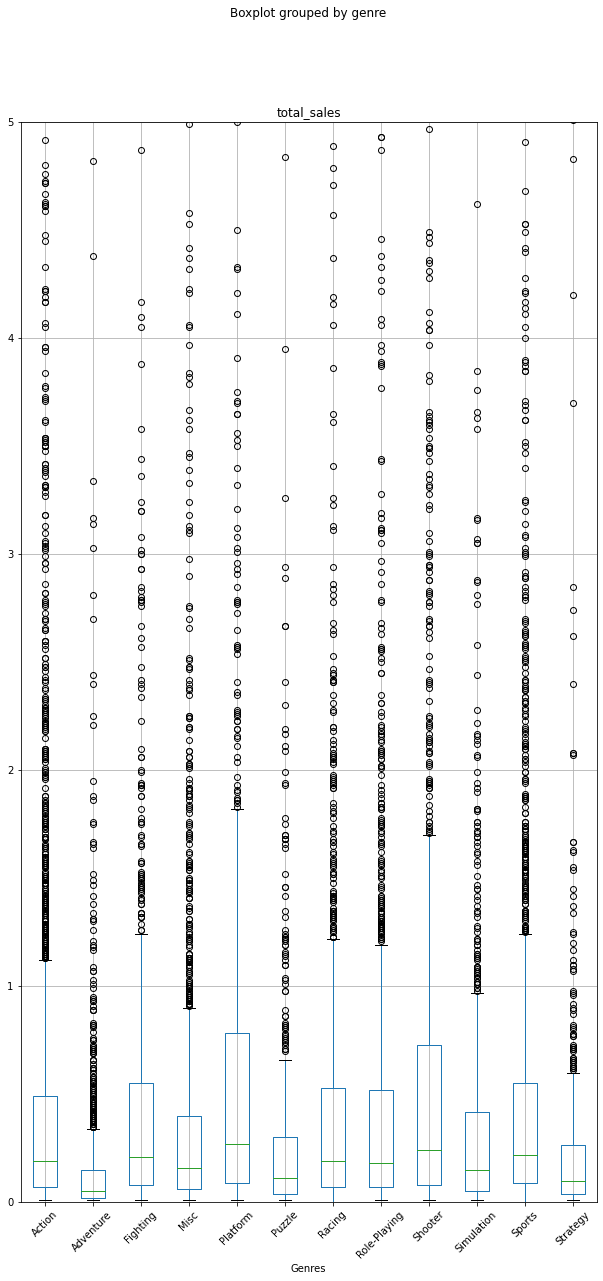

In [35]:

# Investigando a venda de diferentes generos
df_games_treated.boxplot(column=['total_sales']
                                    , by=['genre']
                                    , rot=45
                                    , figsize=(10,20))
# Set plot parameters
plt.ylim(0,5)
plt.xlabel('Genres')
plt.grid(True)

#Showing the graph
plt.show()

In [36]:
df_games_treated.groupby(by=['genre'])['total_sales'].sum().sort_values(ascending=False)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

In [37]:
df_games_treated.groupby(by=['genre'])['total_sales'].mean().sort_values(ascending=False)

genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
Name: total_sales, dtype: float64

In [38]:
df_games_treated.groupby(by=['genre'])['total_sales'].std().sort_values(ascending=False)

genre
Platform        2.574506
Sports          2.084778
Shooter         1.816425
Role-Playing    1.710178
Racing          1.656602
Puzzle          1.562444
Misc            1.304635
Simulation      1.186820
Action          1.145597
Fighting        0.952304
Strategy        0.518998
Adventure       0.508533
Name: total_sales, dtype: float64

## Comentários sobre as vendas de jogos de diferentes generos

O Genero que mais rendeu dinheiro foi o genero de ação. Em compensasão, na média o genero fica em sétimo lugar. Por outro lado, o genero de plataforma é o que vende mais na média, porém anas vendas totais fica apenas em 5 lugar.

No gráfico pode-se notar que a mediana dos jogos de plataforma é o maior, assim como o p75 e o p75 + 1,5 IQ. Isso significa que é um genero com grande potencial para investimento. O p25 dele também é alto, indicando uma boa performance no geral. 

Isso pode se confirmar olhando o desvio-padrão do genero, que é o maior de todos. 

Sobre os generos com vendas baixas, pode-se destacar o genero de aventura. Ele tem a pior média, a segunda pior soma de vendas totais e o desvio padrão mais baixo (indicando que os valores ficam mais em torno da pior média). Pelo gráfico nota-se que o p75 dele também é muito mais baixo que os outros, chegando a aproximadamente 0,4.

# Perfil de usuário para cada região (AN, UE, JP) 

In [39]:
# Para analisar os jogos de diferentes regiões, vamos considerar apenas os jogos que venderam
# nas 3 regiões

mask_games_sold_3regions = ((df_games_treated['na_sales']>0)&(df_games_treated['eu_sales']>0)&(df_games_treated['jp_sales']>0))

df_games_treated_sold_worldwide = df_games_treated[mask_games_sold_3regions]

## As 5 plataformas principais

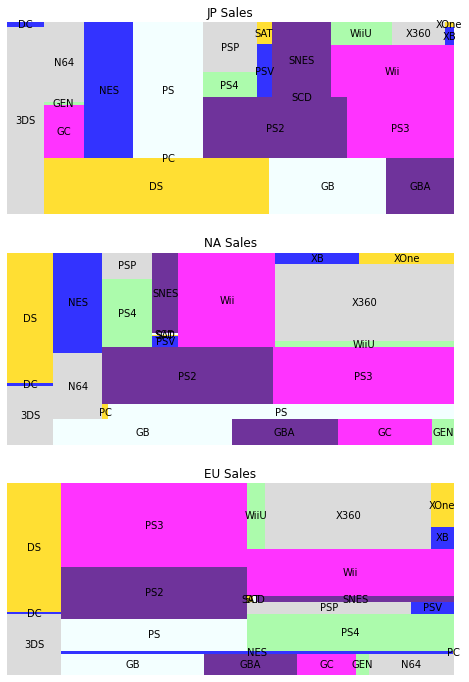

In [40]:
# Importando biblioteca para plotar um Treemap 
import squarify

#Agrupando por plataforma
df_games_sold_worldwide_byp = df_games_treated_sold_worldwide.groupby(by=['platform'], as_index=False).sum().sort_values(by=['platform'])

colors_treegraph = ['lightgrey', 'blue', 'gold', 'azure', 'indigo', 'magenta', 'palegreen']

# Criando 3 linhas e 1 coluna por subplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Gráfico de vendas do japão - jp_sales
squarify.plot(sizes=df_games_sold_worldwide_byp['jp_sales'],
              label=df_games_sold_worldwide_byp['platform'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[0])
axes[0].set_title('JP Sales')

# Gráfico de vendas da America do norte - na_sales
squarify.plot(sizes=df_games_sold_worldwide_byp['na_sales'],
              label=df_games_sold_worldwide_byp['platform'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[1])
axes[1].set_title('NA Sales')

# Gráfico de vendas da Europa - eu_sales
squarify.plot(sizes=df_games_sold_worldwide_byp['eu_sales'],
              label=df_games_sold_worldwide_byp['platform'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[2])
axes[2].set_title('EU Sales')

# Tirando as marcações dos eixos
for ax in axes:
    ax.axis('off')

plt.show()


In [41]:
#Calculando a porcentagem de cada plataforma sobre o total de vendas da região

df_games_sold_worldwide_byp['jp_sales_share'] =  df_games_sold_worldwide_byp['jp_sales']/df_games_sold_worldwide_byp['jp_sales'].sum()*100

df_games_sold_worldwide_byp['na_sales_share'] =  df_games_sold_worldwide_byp['na_sales']/df_games_sold_worldwide_byp['na_sales'].sum()*100

df_games_sold_worldwide_byp['eu_sales_share'] =  df_games_sold_worldwide_byp['eu_sales']/df_games_sold_worldwide_byp['eu_sales'].sum()*100

df_games_sold_worldwide_byp.set_index('platform')[['jp_sales_share','na_sales_share','eu_sales_share']].sort_values(by=['na_sales_share'],ascending=False)

,jp_sales_share,na_sales_share,eu_sales_share
platform,,,
X360,1.406470,15.958382,12.700429
PS3,7.574651,12.043931,18.254038
PS2,10.221249,11.342428,11.217471
Wii,7.500270,10.711214,11.456964
DS,14.781456,7.010405,8.146412
PS,11.002921,5.997225,6.974503
NES,7.868116,5.730867,1.536990
GB,7.661203,5.255029,3.468997
PS4,1.561993,3.964855,8.891177


## Os 5 principais gêneros

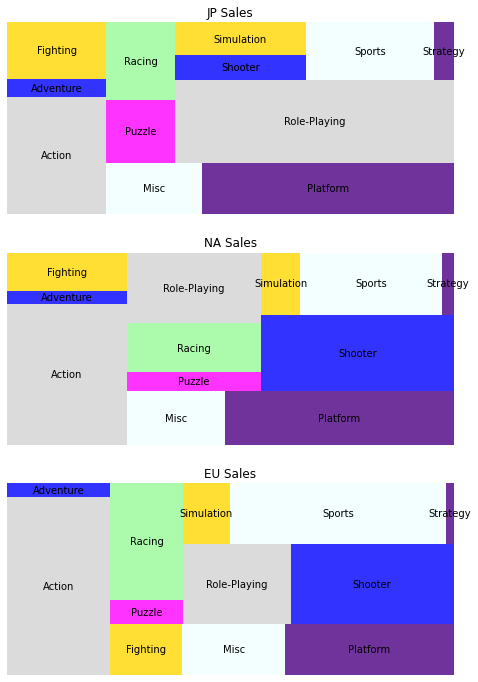

In [42]:
# Importando biblioteca para plotar um Treemap 
import squarify

#Agrupando por generos
df_games_sold_worldwide_byg = df_games_treated_sold_worldwide.groupby(by=['genre'], as_index=False).sum().sort_values(by=['genre'])

# Criando 3 linhas e 1 coluna por subplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Gráfico de vendas do japão - jp_sales
squarify.plot(sizes=df_games_sold_worldwide_byg['jp_sales'],
              label=df_games_sold_worldwide_byg['genre'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[0])
axes[0].set_title('JP Sales')

# Gráfico de vendas da America do norte - na_sales
squarify.plot(sizes=df_games_sold_worldwide_byg['na_sales'],
              label=df_games_sold_worldwide_byg['genre'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[1])
axes[1].set_title('NA Sales')

# Gráfico de vendas da Europa - eu_sales
squarify.plot(sizes=df_games_sold_worldwide_byg['eu_sales'],
              label=df_games_sold_worldwide_byg['genre'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[2])
axes[2].set_title('EU Sales')

# Tirando as marcações dos eixos
for ax in axes:
    ax.axis('off')

plt.show()


In [43]:
#Calculando a porcentagem de cada gênero sobre o total de vendas da região

df_games_sold_worldwide_byg['jp_sales_share'] =  df_games_sold_worldwide_byg['jp_sales']/df_games_sold_worldwide_byg['jp_sales'].sum()*100

df_games_sold_worldwide_byg['na_sales_share'] =  df_games_sold_worldwide_byg['na_sales']/df_games_sold_worldwide_byg['na_sales'].sum()*100

df_games_sold_worldwide_byg['eu_sales_share'] =  df_games_sold_worldwide_byg['eu_sales']/df_games_sold_worldwide_byg['eu_sales'].sum()*100

df_games_sold_worldwide_byg.set_index('genre')[['jp_sales_share','na_sales_share','eu_sales_share']].sort_values(by=['na_sales_share'],ascending=False)

,jp_sales_share,na_sales_share,eu_sales_share
genre,,,
Action,13.562967,19.675838,21.361605
Shooter,3.729850,17.213873,15.267677
Platform,15.222330,14.276532,9.994451
Role-Playing,26.950124,11.096416,10.120769
Sports,8.557828,10.217803,15.323169
Racing,6.224981,7.678150,9.930197
Misc,5.754355,6.142428,6.094658
Fighting,6.517094,5.363699,4.291159
Puzzle,5.036244,2.927168,2.020357


Os cinco principais generos são diferentes nas 3 regiões. A região do Japão é a que mais se distoa das demais.

No Japão ha um grande destaque para o genero de Role-Playing, que ocupa as posições 4 e 5 na América do Norte e Europa.

Interessante observar que o genero de Aventura vai mal nas 3 regiões, corroborando com os comentários anteriores feitos no caderno

## Os Ratings afetam as vendas nas regiões?

In [44]:
#Agrupando por rating
df_games_sold_worldwide_byr = df_games_treated_sold_worldwide.groupby(by=['rating'], as_index=False).sum().sort_values(by=['rating'])

#Calculando a porcentagem de cada gênero sobre o total de vendas da região

df_games_sold_worldwide_byr['jp_sales_share'] =  df_games_sold_worldwide_byr['jp_sales']/df_games_sold_worldwide_byr['jp_sales'].sum()*100

df_games_sold_worldwide_byr['na_sales_share'] =  df_games_sold_worldwide_byr['na_sales']/df_games_sold_worldwide_byr['na_sales'].sum()*100

df_games_sold_worldwide_byr['eu_sales_share'] =  df_games_sold_worldwide_byr['eu_sales']/df_games_sold_worldwide_byr['eu_sales'].sum()*100

df_games_sold_worldwide_byr.set_index('rating')[['jp_sales_share','na_sales_share','eu_sales_share']].sort_values(by=['na_sales_share'],ascending=False)

,jp_sales_share,na_sales_share,eu_sales_share
rating,,,
UNKNOWN,43.889971,30.470751,24.596221
E,25.481445,25.293873,31.518152
M,8.125068,24.579422,25.167937
T,17.541653,15.416416,14.623675
E10+,4.764416,4.227514,4.082333
K-A,0.197447,0.012023,0.011683


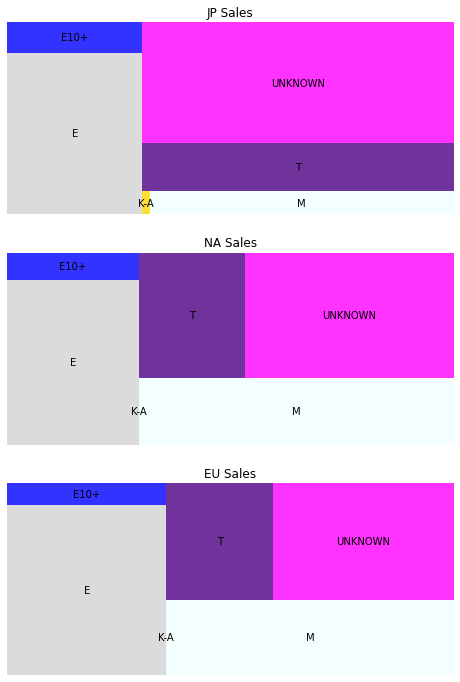

In [45]:
# Criando 3 linhas e 1 coluna por subplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Gráfico de vendas do japão - jp_sales
squarify.plot(sizes=df_games_sold_worldwide_byr['jp_sales'],
              label=df_games_sold_worldwide_byr['rating'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[0])
axes[0].set_title('JP Sales')

# Gráfico de vendas da America do norte - na_sales
squarify.plot(sizes=df_games_sold_worldwide_byr['na_sales'],
              label=df_games_sold_worldwide_byr['rating'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[1])
axes[1].set_title('NA Sales')

# Gráfico de vendas da Europa - eu_sales
squarify.plot(sizes=df_games_sold_worldwide_byr['eu_sales'],
              label=df_games_sold_worldwide_byr['rating'],
              alpha=.8,
              color=colors_treegraph,
              ax=axes[2])
axes[2].set_title('EU Sales')

# Tirando as marcações dos eixos
for ax in axes:
    ax.axis('off')

plt.show()

# Teste de hipóteses

## Comparação entre classificações médias dos usuários das plataformas Xbox One e PC

**Para o teste de Levene**

 H0 -->  σ²(XOne) = σ²(PC)
 
 H1 -->  σ²(XOne) <> σ²(PC)
 
 α = 95%

**Para o teste de hipótese**

 H0 -->  μ(XOne) = μ(PC)
 
 H1 -->  μ(XOne) <> μ(PC)
 
 α = 95%

In [46]:
# Contruindo os filtros para as plataformas, com o user_rating > 0
mask_platform_xone = ((df_games_treated['platform'] == 'XOne')&(~df_games_treated['user_score'].isna()))

mask_platform_pc = ((df_games_treated['platform'] == 'PC')&(~df_games_treated['user_score'].isna()))

In [47]:
# Executando o teste de Levene para checar se as variâncias dos user_ratings de PC é igual ao do Xbox One

levene_test1 = st.levene(df_games_treated[mask_platform_xone]['user_score']
                   ,df_games_treated[mask_platform_pc]['user_score']
                   ,center='median')

#Imprimindo resultados

print('alpha_levene1 = 0.05')
print(f'O p-valor é {levene_test1.pvalue}')

alpha_levene1 = 0.05
O p-valor é 0.2693951512047048


In [48]:
# Testando as hipóteses
# O teste de Levene indicou a variância das amostras é igual

test1 = st.ttest_ind(df_games_treated[mask_platform_xone]['user_score']
                      ,df_games_treated[mask_platform_pc]['user_score']
                      ,equal_var=True)

print('alpha_test1 = 0.05')
print(f'O p-valor é {test1.pvalue}')

alpha_test1 = 0.05
O p-valor é 1.3896435533548819e-05


**Conclusões sobre o teste de hipótese**

 -O teste de hipótese indicou que devemos rejeitar H0, ou seja, ha indicios que apontem uma diferença na média entre a classificação dos usuários de jogos de PC e a classificação dos usuários de jogos do Xbox. 

## Comparação entre classificações médias dos usuários dos generos Action e Sports

**Para o teste de Levene**

 H0 -->  σ²(Action) = σ²(Sports)
 
 H1 -->  σ²(Action) <> σ²(Sports)
 
 α = 95%

**Para o teste de hipótese**

 H0 -->  μ(Action) = μ(Sports)
 
 H1 -->  μ(Action) <> μ(Sports)
 
 α = 95%

In [49]:
# Contruindo os filtros para os generos
mask_genre_action = ((df_games_treated['genre'] == 'Action')&(~df_games_treated['user_score'].isna()))

mask_genre_sports = ((df_games_treated['genre'] == 'Sports')&(~df_games_treated['user_score'].isna()))

In [50]:
# Executando o teste de Levene para checar se as variâncias dos user_ratings de PC é igual ao do Xbox One

levene_test2 = st.levene(df_games_treated[mask_genre_action]['user_score']
                   ,df_games_treated[mask_genre_sports]['user_score']
                   ,center='median')

#Imprimindo resultados

print('alpha_levene2 = 0.05')
print(f'O p-valor é {levene_test2.pvalue}')

alpha_levene2 = 0.05
O p-valor é 0.0001736640672727649


In [51]:
# Testando as hipóteses
# O teste de Levene indicou a variância das amostras é diferente

test2 = st.ttest_ind(df_games_treated[mask_genre_action]['user_score']
                      ,df_games_treated[mask_genre_sports]['user_score']
                      ,equal_var=False)

#Imprimindo os resultados

print('alpha_test2 = 0.05')
print(f'O p-valor é {test2.pvalue}')

alpha_test2 = 0.05
O p-valor é 0.11483818791498286


**Conclusões sobre o teste de hipótese**

 -O teste de hipótese indica que não podemos rejeitar H0, ou seja, não ha indicios que apontem uma diferença na média entre a classificação dos usuários do gênero de ação e do genêro de esportes.

# Conclusão Geral

**Principais pontos**

1.) Até os anos 2000, os jogos não eram muito populares. Entre os anos 2000 e 2011 a indústria cresceu exponencialmente. Depois de 2011 as vendas totais cairam.

2.) Plataformas diferentes vendem em quantidades e períodos diferentes. O tempo usual do ciclo de vida de uma plataforma é aproximadamente 5 anos.

3.) Generos diferentes vendem em quantidades diferentes e em locais diferentes. Um genero que faz sucesso no Japão não necessariamente fará sucesso na América do Norte, e vice-versa.

4.) As notas de usuário e da crítica não são boas preditoras para as vendas dos jogos(especialmente as notas de usuários).

5.) Os usuários parecem dar notas médias diferentes para jogos de Xbox One e PC.

6.) Os usuários parecem dar notas médias iguais para jogos do genero ação e jogos do gênero de esportes.